In [29]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder 
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [30]:
casas_limpio_no_outliers = pd.read_csv(r"data\casas_limpio_no_outliers.csv")

In [31]:
casas_no_outliers_categorical = casas_limpio_no_outliers.copy()

In [32]:
casas_no_outliers_categorical.head(5)

,Unnamed: 0,bedrooms,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,price,bat_bed,sqft_floors
0,0,3,0,0,3,7,1180,0,98178,221900,0.333333,1180.0
1,1,3,0,0,3,7,2170,400,98125,538000,0.666667,1085.0
2,2,2,0,0,3,6,770,0,98028,180000,0.500000,770.0
3,3,4,0,0,5,7,1050,910,98136,604000,0.750000,1050.0
4,4,3,0,0,3,8,1680,0,98074,510000,0.666667,1680.0


In [33]:
casas_no_outliers_categorical.drop('Unnamed: 0', axis=1, inplace=True)

In [34]:
casas_no_outliers_categorical.shape

(20406, 11)

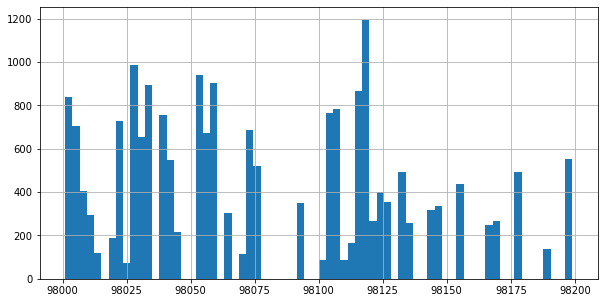

In [35]:
casas_no_outliers_categorical['zipcode'].hist(bins = 70, figsize = (10,5))
plt.show()

In [36]:
casas_no_outliers_categorical['zipcode'].value_counts().plot
plt.show()

In [37]:
oh = OneHotEncoder()

In [38]:
transformados = oh.fit_transform(casas_no_outliers_categorical[["zipcode"]])

In [39]:
oh_df = pd.DataFrame(transformados.toarray(), dtype = int)

In [40]:
oh_df.shape

(20406, 70)

In [41]:
oh_df.columns = oh.get_feature_names()

In [42]:
casas_no_outliers_categorical[oh_df.columns] = oh_df

In [43]:
casas_no_outliers_categorical.drop('zipcode', axis=1, inplace=True)

In [44]:
casas_no_outliers_categorical.shape

(20406, 80)

<AxesSubplot:xlabel='price', ylabel='Count'>

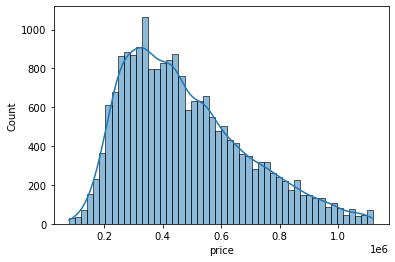

In [45]:
sns.histplot(casas_no_outliers_categorical['price'], kde = True)

In [46]:
casas_est = casas_no_outliers_categorical.copy()

In [47]:
media = casas_est['price'].mean()
maximo = casas_est['price'].max() 
minimo = casas_est['price'].min()

In [48]:
#casas_est['price_NORM'] = (casas_est['price'] - media) / (maximo - minimo )

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('original')
axes[1].set_title('normalizado')

sns.distplot(casas_est['price'], ax = axes[0])
sns.distplot(casas_est['price_NORM'], ax = axes[1]);

In [ ]:
#casas_est['price_LOG'] = casas_est['price'].apply(lambda x: np.log(x) if x != 0 else 0)

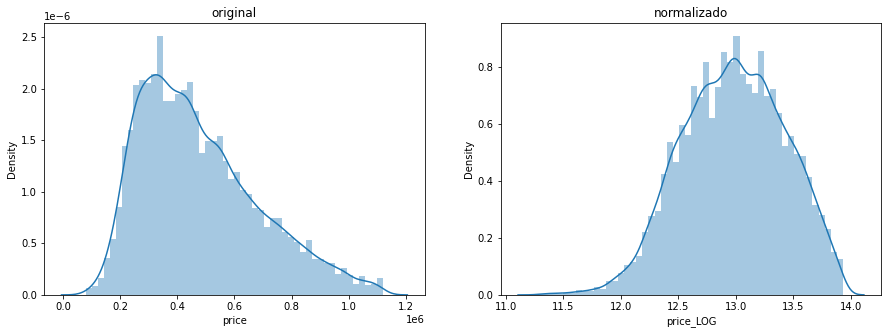

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('original')
axes[1].set_title('normalizado')

sns.distplot(casas_est['price'], ax = axes[0])
sns.distplot(casas_est['price_LOG'], ax = axes[1]);

In [ ]:
#casas_est['price_SQRT'] = casas_est['price'].apply(lambda x: math.sqrt(x))

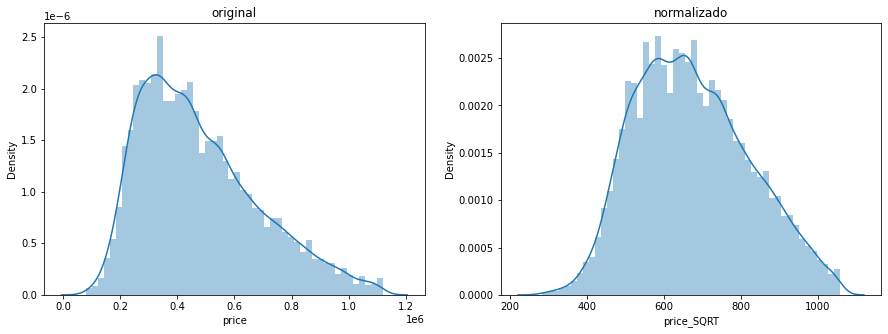

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('original')
axes[1].set_title('normalizado')

sns.distplot(casas_est['price'], ax = axes[0])
sns.distplot(casas_est['price_SQRT'], ax = axes[1]);

In [50]:
fitted_data, fitted_lambda = stats.boxcox(casas_est['price'])

No handles with labels found to put in legend.


Lambda value used for Transformation: 0.16392031899037937


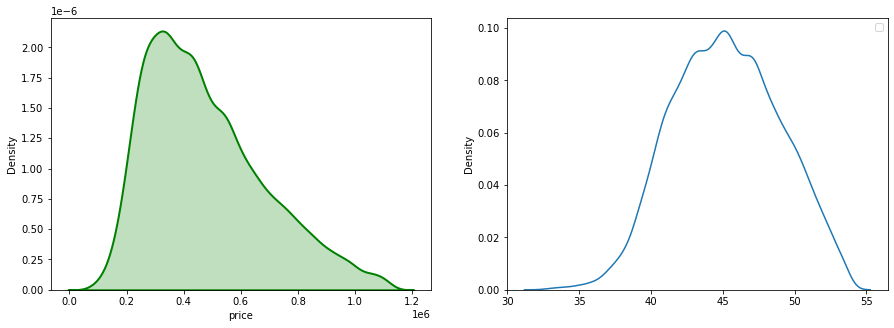

In [51]:
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(casas_est['price'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(fitted_data, hist = False, kde = True)
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(15)
  
print(f"Lambda value used for Transformation: {fitted_lambda}")

In [52]:
fitted_data, fitted_lambda = stats.boxcox(casas_est['price'])
casas_est['price_BOXCOX'] = fitted_data

In [54]:
casas_est.drop('price', axis=1, inplace=True)

In [55]:
casas_est.head(5)

,bedrooms,waterfront,view,condition,grade,sqft_above,sqft_basement,bat_bed,sqft_floors,x0_98001,x0_98002,x0_98003,x0_98004,x0_98005,x0_98006,x0_98007,x0_98008,x0_98010,x0_98011,x0_98014,x0_98019,x0_98022,x0_98023,x0_98024,x0_98027,x0_98028,x0_98029,x0_98030,x0_98031,x0_98032,x0_98033,x0_98034,x0_98038,x0_98039,x0_98040,x0_98042,x0_98045,x0_98052,x0_98053,x0_98055,x0_98056,x0_98058,x0_98059,x0_98065,x0_98070,x0_98072,x0_98074,x0_98075,x0_98077,x0_98092,x0_98102,x0_98103,x0_98105,x0_98106,x0_98107,x0_98108,x0_98109,x0_98112,x0_98115,x0_98116,x0_98117,x0_98118,x0_98119,x0_98122,x0_98125,x0_98126,x0_98133,x0_98136,x0_98144,x0_98146,x0_98148,x0_98155,x0_98166,x0_98168,x0_98177,x0_98178,x0_98188,x0_98198,x0_98199,price_BOXCOX
0,3,0,0,3,7,1180,0,0.333333,1180.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,39.788731
1,3,0,0,3,7,2170,400,0.666667,1085.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46.958452
2,2,0,0,3,6,770,0,0.500000,770.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38.241258
3,4,0,0,5,7,1050,910,0.750000,1050.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,47.974488
4,3,0,0,3,8,1680,0,0.666667,1680.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46.495622


In [56]:
casas_est.to_csv(r"data\casas_est.csv", index=False)

In [ ]:
casas_no_outliers_categorical.to_csv(r'data\casas_no_outliers_categorical.csv')

In [68]:
casas_est2 = casas_est.copy()

In [69]:
casas_est2.head(5)

,bedrooms,waterfront,view,condition,grade,sqft_above,sqft_basement,bat_bed,sqft_floors,x0_98001,x0_98002,x0_98003,x0_98004,x0_98005,x0_98006,x0_98007,x0_98008,x0_98010,x0_98011,x0_98014,x0_98019,x0_98022,x0_98023,x0_98024,x0_98027,x0_98028,x0_98029,x0_98030,x0_98031,x0_98032,x0_98033,x0_98034,x0_98038,x0_98039,x0_98040,x0_98042,x0_98045,x0_98052,x0_98053,x0_98055,x0_98056,x0_98058,x0_98059,x0_98065,x0_98070,x0_98072,x0_98074,x0_98075,x0_98077,x0_98092,x0_98102,x0_98103,x0_98105,x0_98106,x0_98107,x0_98108,x0_98109,x0_98112,x0_98115,x0_98116,x0_98117,x0_98118,x0_98119,x0_98122,x0_98125,x0_98126,x0_98133,x0_98136,x0_98144,x0_98146,x0_98148,x0_98155,x0_98166,x0_98168,x0_98177,x0_98178,x0_98188,x0_98198,x0_98199,price_BOXCOX
0,3,0,0,3,7,1180,0,0.333333,1180.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,39.788731
1,3,0,0,3,7,2170,400,0.666667,1085.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46.958452
2,2,0,0,3,6,770,0,0.500000,770.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38.241258
3,4,0,0,5,7,1050,910,0.750000,1050.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,47.974488
4,3,0,0,3,8,1680,0,0.666667,1680.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46.495622


In [73]:
box_cox = ['sqft_above', 'sqft_floors']

In [78]:
casas_est2.head(5)

,bedrooms,waterfront,view,condition,grade,sqft_above,sqft_basement,bat_bed,sqft_floors,x0_98001,x0_98002,x0_98003,x0_98004,x0_98005,x0_98006,x0_98007,x0_98008,x0_98010,x0_98011,x0_98014,x0_98019,x0_98022,x0_98023,x0_98024,x0_98027,x0_98028,x0_98029,x0_98030,x0_98031,x0_98032,x0_98033,x0_98034,x0_98038,x0_98039,x0_98040,x0_98042,x0_98045,x0_98052,x0_98053,x0_98055,x0_98056,x0_98058,x0_98059,x0_98065,x0_98070,x0_98072,x0_98074,x0_98075,x0_98077,x0_98092,x0_98102,x0_98103,x0_98105,x0_98106,x0_98107,x0_98108,x0_98109,x0_98112,x0_98115,x0_98116,x0_98117,x0_98118,x0_98119,x0_98122,x0_98125,x0_98126,x0_98133,x0_98136,x0_98144,x0_98146,x0_98148,x0_98155,x0_98166,x0_98168,x0_98177,x0_98178,x0_98188,x0_98198,x0_98199,price_BOXCOX
0,1.557814,0,0,3,7,3.860043,0,0.333333,35.098164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,39.788731
1,1.557814,0,0,3,7,4.006980,400,0.666667,33.929209,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46.958452
2,0.860371,0,0,3,6,3.746299,0,0.500000,29.517157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38.241258
3,2.166845,0,0,5,7,3.829865,910,0.750000,33.482435,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,47.974488
4,1.557814,0,0,3,8,3.947346,0,0.666667,40.441809,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46.495622


In [ ]:
for i in box_cox:
    fitted_data, fitted_lambda = stats.boxcox(casas_est2[i])
    casas_est2[i] = fitted_data

In [79]:
casas_est2.to_csv(r'data\casas_est2.csv')